In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note
names = cols <br>
This tells Pandas to assign these names to the columns instead of using the first row of the file as headers <br>
sep = "\s+" <br>
- sep specifies the delimiter (how values are separated in the file).<br>
- \s+ is a regular expression meaning “one or more whitespace characters” (spaces, tabs, etc.).<br>
- So Pandas will split each line wherever there’s whitespace, no matter how many spaces or tabs are used.<br>


In [3]:
cols = ["area","perimeter","compactness","length","width","asymmetry","groove","class"]
df = pd.read_csv("seeds_dataset.txt",names=cols,sep="\s+")

In [4]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Note 
- Outer loop (i) → picks first feature.<br>
- Inner loop (j) → pairs it with another feature (avoids duplicates).<br>
- sns.scatterplot(...) → plots feature pairs, coloring points by "class".<br>
- plt.show() → displays each plot one by one.<br>

## Why 3 Classes<br>
- Seeds dataset has 3 wheat types: Kama, Rosa, Canadian.<br>
- "class" column encodes these categories.<br>
- Seaborn colors scatter points into 3 groups.<br>


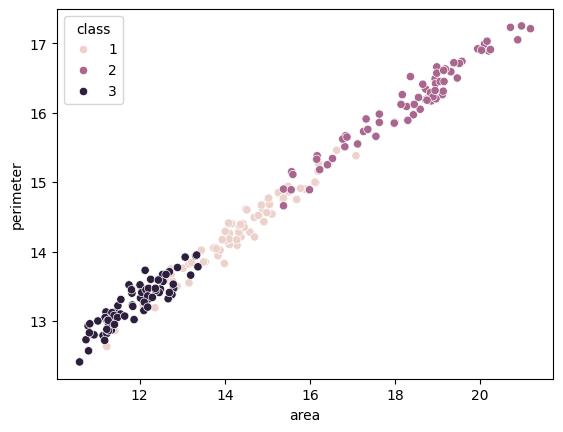

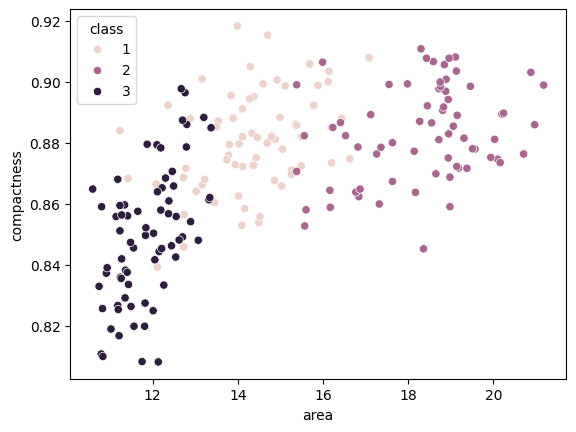

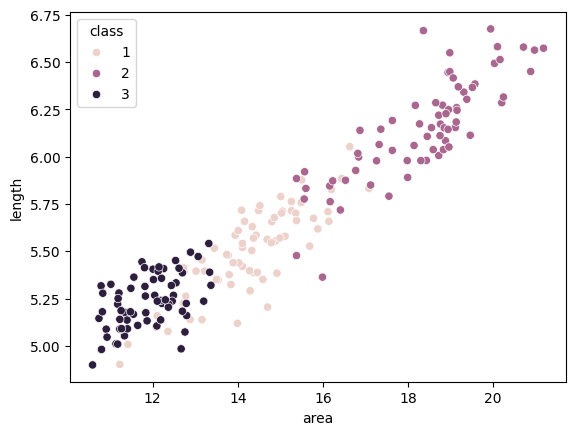

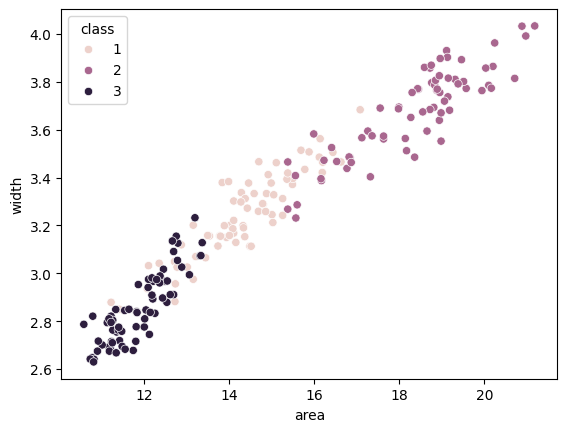

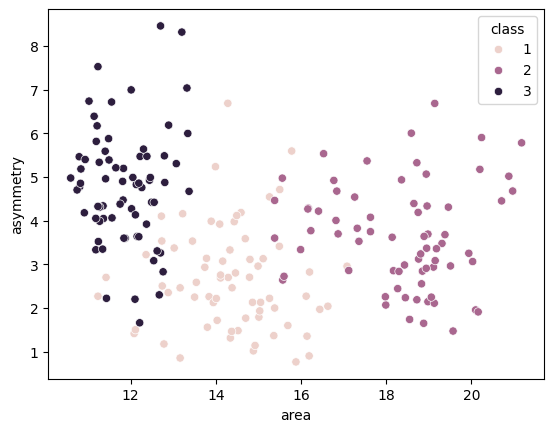

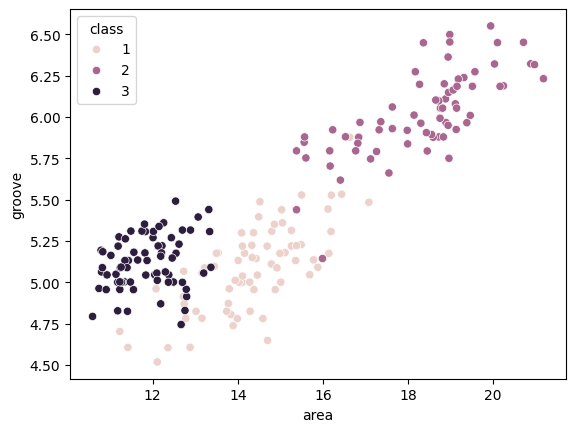

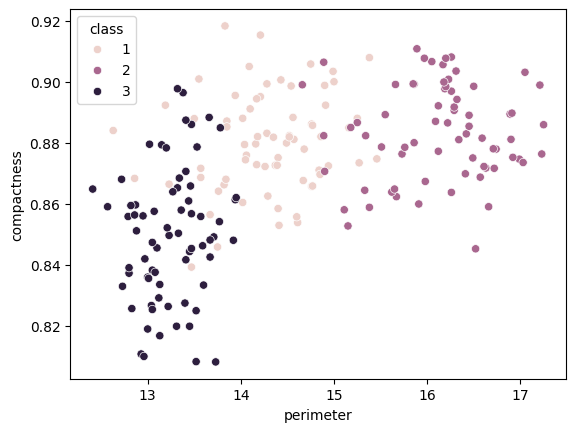

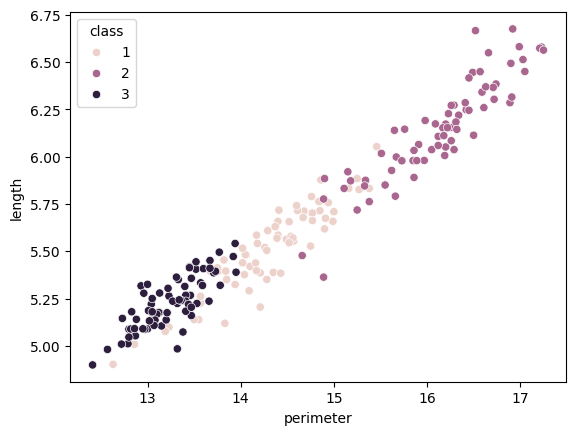

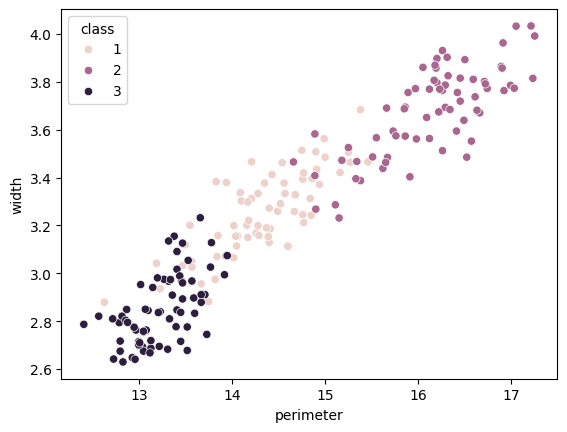

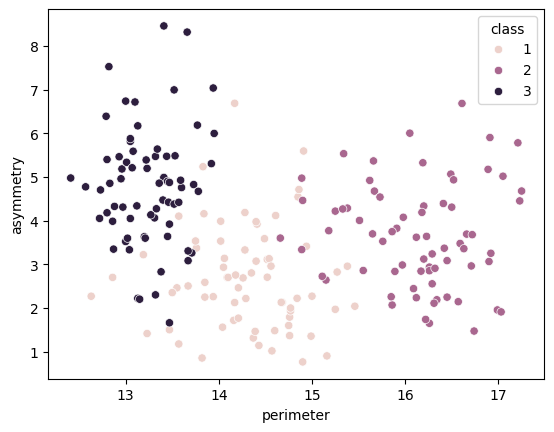

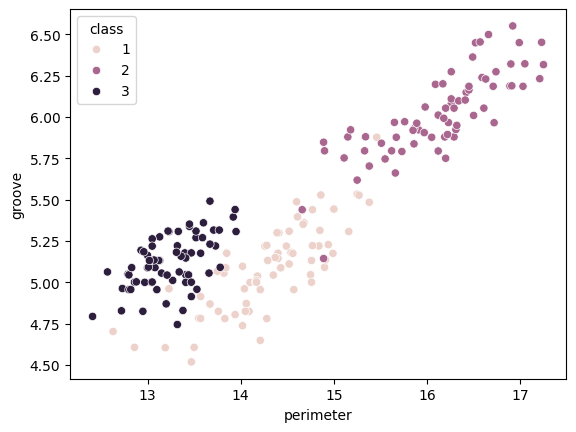

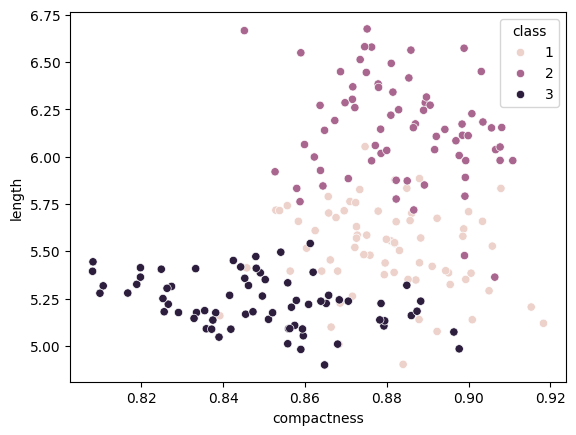

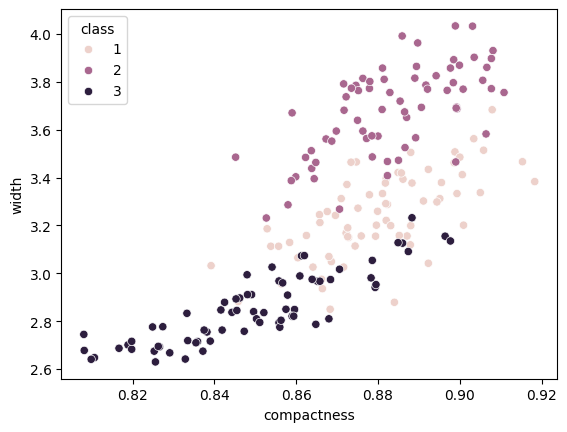

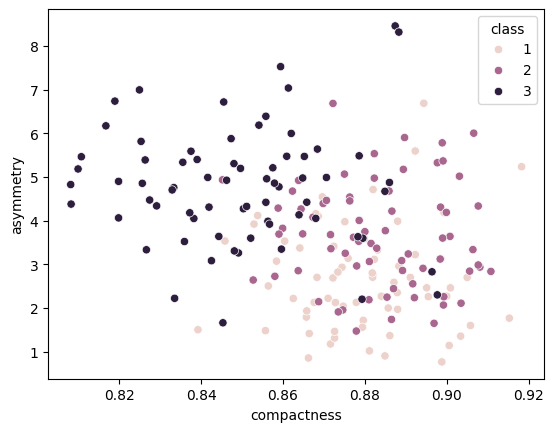

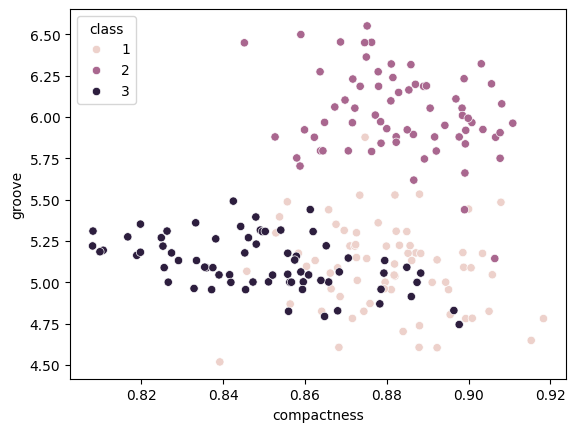

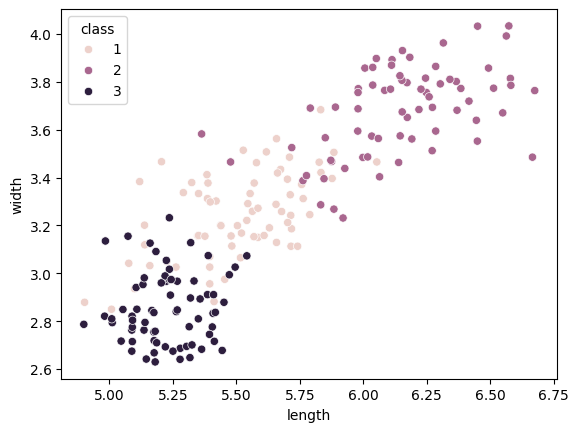

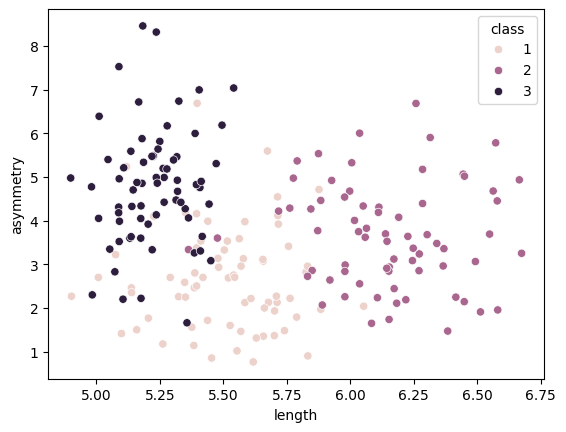

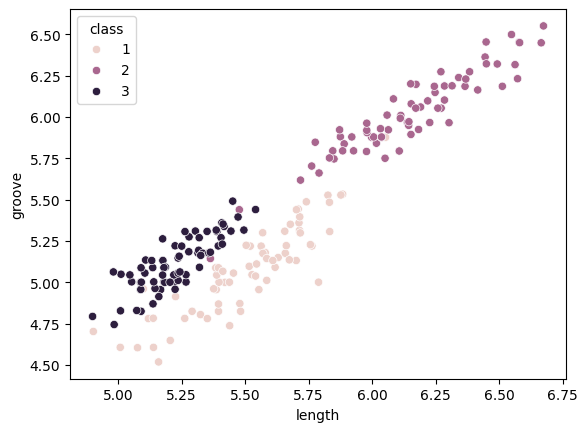

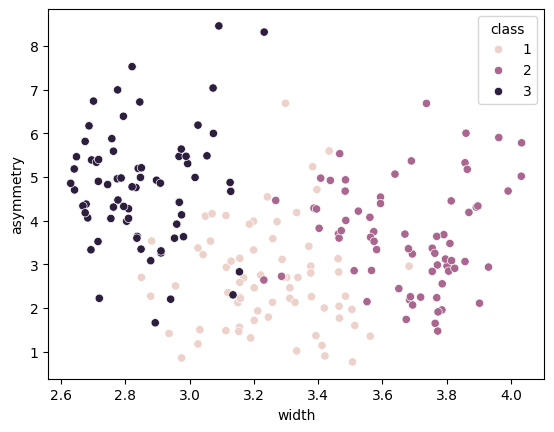

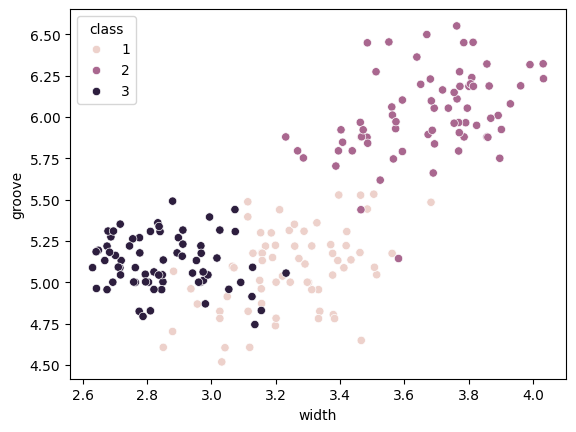

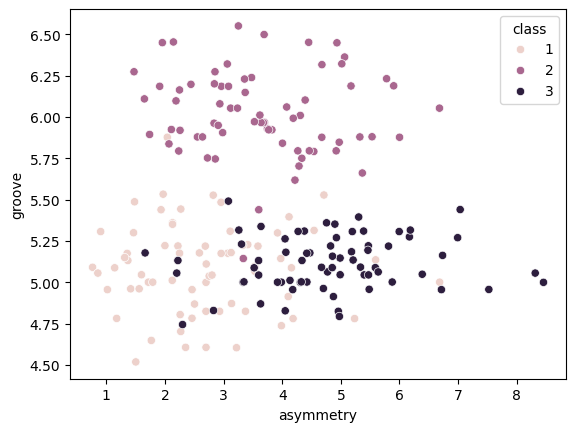

In [5]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x =x_label, y=y_label, data=df ,hue='class')
        plt.show()

# Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
x = "compactness"
y= "asymmetry"
X = df[[x,y]].values

In [8]:
kmeans = KMeans(n_clusters= 3).fit(X)

In [9]:
clusters = kmeans.labels_

In [10]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x,y,"class"])

##  K Means vs original data

[]

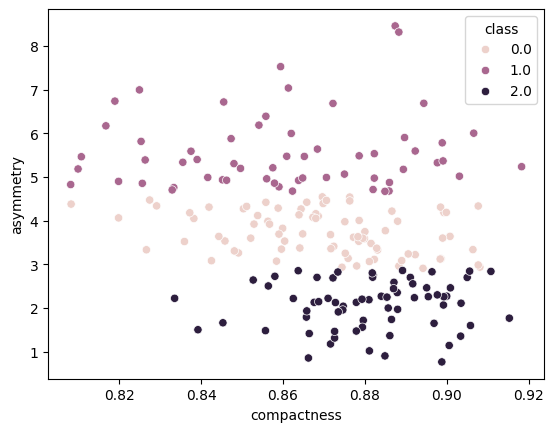

In [11]:
sns.scatterplot(x=x,y=y,hue='class', data=cluster_df)
plt.plot()

[]

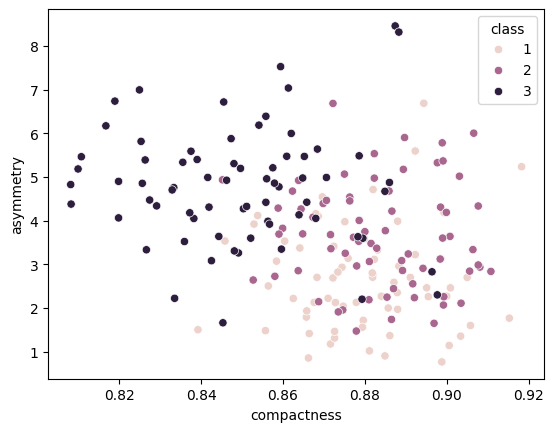

In [12]:
sns.scatterplot(x=x,y=y,hue='class',data=df)
plt.plot()

## Higher Dimensions

Removing the class from data and testing

In [13]:
X = df[cols[:-1]].values

In [14]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X,kmeans.labels_.reshape(-1,1))), columns=df.columns)

<Axes: xlabel='compactness', ylabel='asymmetry'>

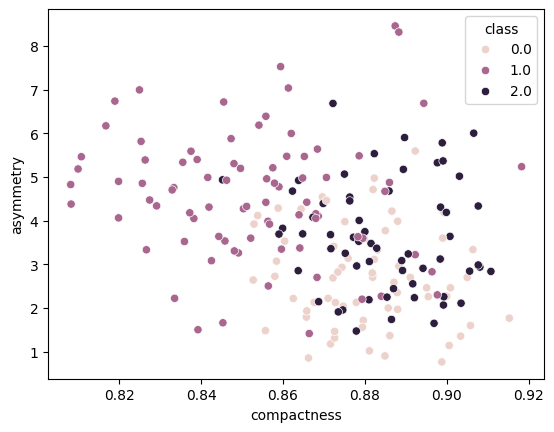

In [15]:
sns.scatterplot(x=x,y=y,hue='class',data=cluster_df)

[]

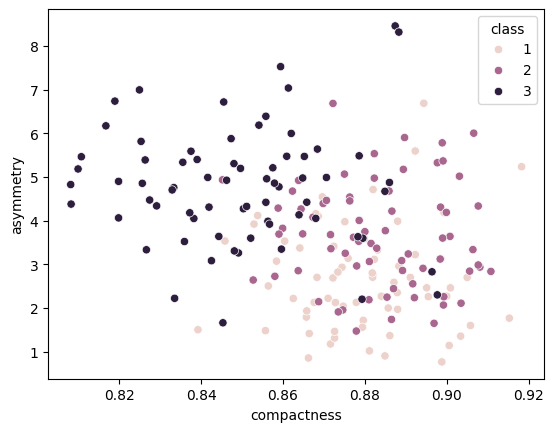

In [16]:
sns.scatterplot(x=x,y=y,hue='class',data=df)
plt.plot()

10 more